# Speed Dating Data Analysis

## Import libraries and dataset

In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding='unicode_escape')

## Description of the Dataset


We can se that the data tinder gathered is rather big : 8378 rows and 195 columns

In addition, we notice that categorical data such as gender is coded as numbers (int64) as indicated in the Data Key document

In [56]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

### Missing data


In [57]:
data = []
for col in df.columns:
        nas = df[col].isnull().value_counts()
        if True in nas.index:
            nas_percent = nas[1]/df.shape[0]*100
            data.append([col,round(nas_percent,2)])
        else:
            data.append([col,0])


missing_data = pd.DataFrame(data)
missing_data.columns = ['variable_name', 'percent_missing_data']
missing_data.describe(include='all')


,variable_name,percent_missing_data
count,195,195.000000
unique,195,NaN
top,amb5_3,NaN
freq,1,NaN
mean,NaN,18.157231
std,NaN,18.020421
min,NaN,0.000000
25%,NaN,1.060000
50%,NaN,10.920000
75%,NaN,35.320000


Several variables are notes from 1 to 10 for several attributes. This kind of data is qualitative and ordinal (attr).

However, for other attributes the chosen scale was a point allocation for a total sum of 100 points (attr1_1) which is closer to a discrete continous variable.

This differnece of scale has to be kept in mind for adequate comparisons. 

We can for example bring the 1-10 scale to a 100 scale  with a simple calculation, which is what was done for most attribute notes.

In [58]:
df[['attr','attr1_1']].describe()

,attr,attr1_1
count,8176.000000,8299.000000
mean,6.189995,22.514632
std,1.950169,12.587674
min,0.000000,0.000000
25%,5.000000,15.000000
50%,6.000000,20.000000
75%,8.000000,25.000000
max,10.000000,100.000000


We can visualize the age distribution of participants.

Most participants were around 26 years of age with some extreme values of 18 years old and 55 years old.

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Density'>

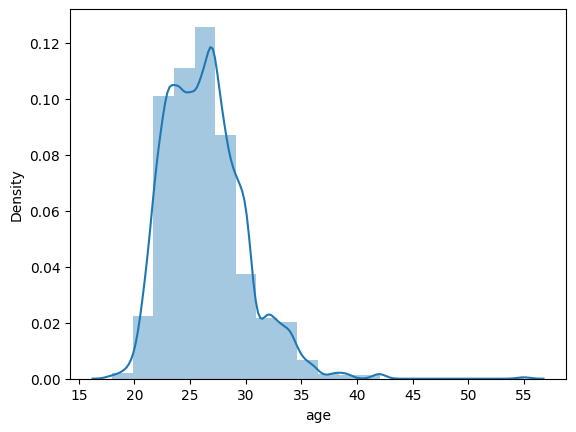

In [59]:
%%capture --no-display --no-stdout

print(df['age'].describe())
sns.distplot(df['age'],bins=20)

# Heatmap

In [60]:
# heatmap stuff
# Scatter plot ? for every pair of columns

## General information on participants

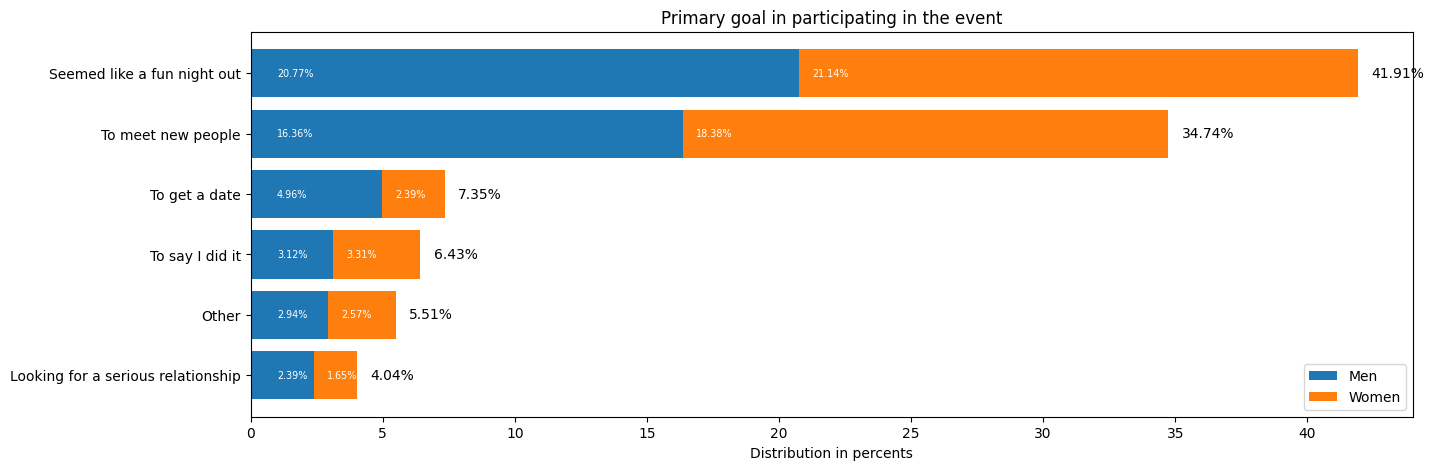

In [61]:
goal_df = df.iloc[:,np.r_[0,2,45]].groupby('iid').mean()

goal_df["goal"] = goal_df["goal"].apply(lambda x : 
                         'Seemed like a fun night out' if x ==1
                         else 'To meet new people' if x == 2
                         else 'To get a date' if x == 3
                         else 'Looking for a serious relationship' if x  == 4
                         else 'To say I did it' if x == 5
                         else 'Other' if x == 6
                         else 'NaN')

goal_df["gender"] = goal_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

goal = goal_df.pivot(columns='gender',values='goal')

gvc = goal_df['goal'].value_counts(ascending=True).drop('NaN')
gm = goal['Man'].value_counts().reindex(goal_df["goal"].unique(), fill_value=0).reindex_like(gvc)
gw = goal['Woman'].value_counts().reindex(goal_df["goal"].unique(), fill_value=0).reindex_like(gvc)

dist_men = [np.round((x / np.sum(gvc)) * 100, 2) for x in gm]
dist_women = [np.round((x / np.sum(gvc)) * 100, 2) for x in gw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Primary goal in participating in the event")
plt.barh(gm.index, dist_men, color='#1f77b4')
plt.barh(gw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')



for i in range(len(dist)):
    plt.text(dist[i]+.5, gvc.index[i],f'{dist[i]}%',va='center',fontweight='roman')
    plt.text(1, gvc.index[i],f'{dist_men[i]}%',va='center',fontsize='x-small',color='white')
    plt.text(dist_men[i]+.5, gvc.index[i],f'{dist_women[i]}%',va='center',fontsize='x-small',color='white')



plt.show()

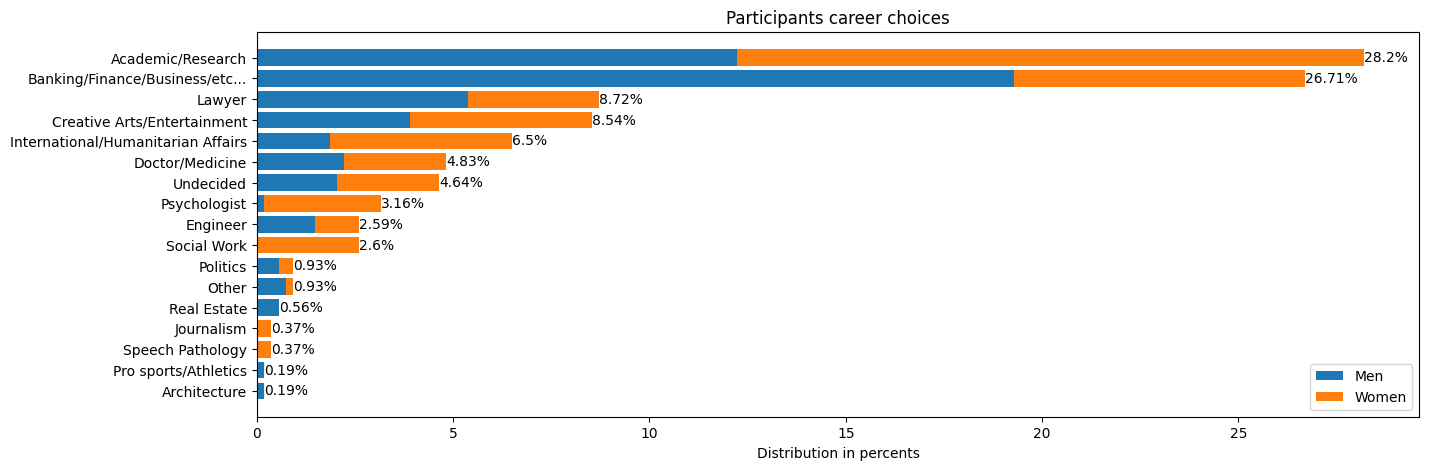

In [62]:
career_df = df.iloc[:,np.r_[0,2,49]].groupby('iid').mean()
career_df["career_c"] = career_df["career_c"].apply(lambda x : 'Lawyer' if x == 1
                                         else 'Academic/Research' if x == 2
                                         else 'Psychologist' if x == 3
                                         else 'Doctor/Medicine' if x == 4
                                         else 'Engineer' if x == 5
                                         else 'Creative Arts/Entertainment' if x == 6
                                         else 'Banking/Finance/Business/etc...' if x == 7
                                         else 'Real Estate' if x == 8
                                         else 'International/Humanitarian Affairs' if x == 9
                                         else 'Undecided' if x == 10
                                         else 'Social Work' if x == 11
                                         else 'Speech Pathology' if x == 12
                                         else 'Politics' if x == 13
                                         else 'Pro sports/Athletics' if x == 14
                                         else 'Other' if x == 15
                                         else 'Journalism' if x == 16
                                         else 'Architecture' if x == 17
                                         else 'NaN')
career_df["gender"] = career_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

career = career_df.pivot(columns='gender',values='career_c')

cvc = career_df['career_c'].value_counts(ascending=True).drop('NaN')
cm = career['Man'].value_counts().reindex(career_df["career_c"].unique(), fill_value=0).reindex_like(cvc)
cw = career['Woman'].value_counts().reindex(career_df["career_c"].unique(), fill_value=0).reindex_like(cvc)

dist_men = [np.round((x / np.sum(cvc)) * 100, 2) for x in cm]
dist_women = [np.round((x / np.sum(cvc)) * 100, 2) for x in cw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Participants career choices")
plt.barh(cm.index, dist_men, color='#1f77b4')
plt.barh(cw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')

for i in range(len(dist)):
    plt.text(dist[i], cvc.index[i],f'{dist[i]}%',va='center')

plt.show()

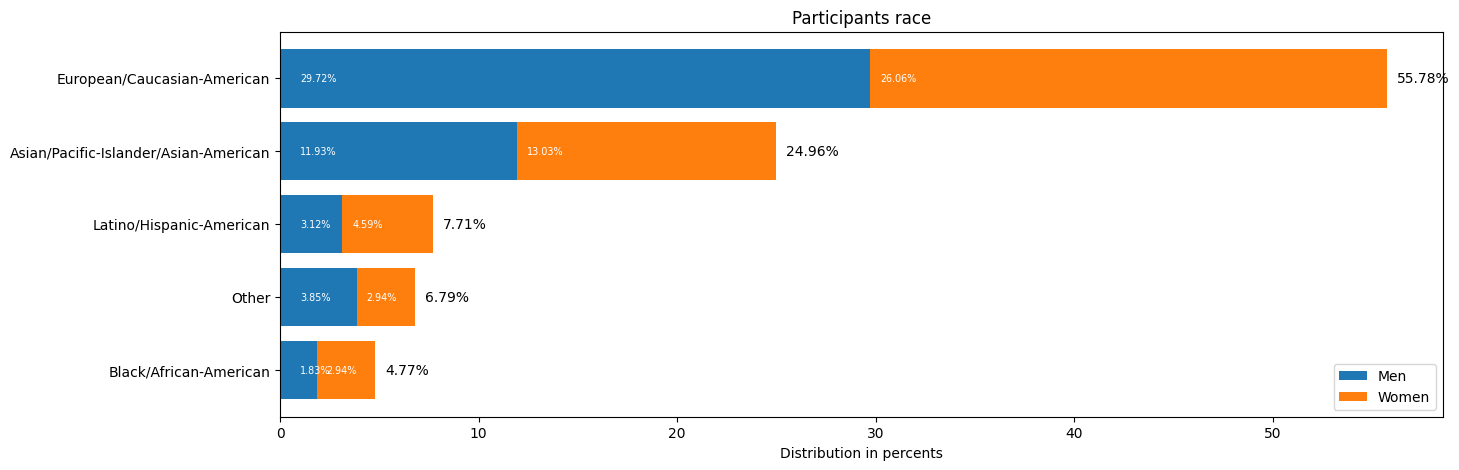

In [63]:
race_df = df.iloc[:,np.r_[0,2,39]].groupby('iid').mean()
race_df["race"] = race_df["race"].apply(lambda x : 'Black/African-American' if x == 1
                                         else 'European/Caucasian-American' if x == 2
                                         else 'Latino/Hispanic-American' if x == 3
                                         else 'Asian/Pacific-Islander/Asian-American' if x == 4
                                         else 'Native American' if x == 5
                                         else 'Other' if x == 6
                                         else 'NaN')

race_df["gender"] = race_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

race = race_df.pivot(columns='gender',values='race')

rvc = race_df['race'].value_counts(ascending=True).drop('NaN')
rm = race['Man'].value_counts().reindex(race_df["race"].unique(), fill_value=0).reindex_like(rvc)
rw = race['Woman'].value_counts().reindex(race_df["race"].unique(), fill_value=0).reindex_like(rvc)

dist_men = [np.round((x / np.sum(rvc)) * 100, 2) for x in rm]
dist_women = [np.round((x / np.sum(rvc)) * 100, 2) for x in rw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Participants race")
plt.barh(rm.index, dist_men, color='#1f77b4')
plt.barh(rw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')


for i in range(len(dist)):
    plt.text(dist[i]+.5, rvc.index[i],f'{dist[i]}%',va='center',fontweight='roman')
    plt.text(1, rvc.index[i],f'{dist_men[i]}%',va='center',fontsize='x-small',color='white')
    plt.text(dist_men[i]+.5, rvc.index[i],f'{dist_women[i]}%',va='center',fontsize='x-small',color='white')
    
plt.show()

# What makes people interested in each other
This is the main question we are going to try to answer. 

In the following I will be looking at differents aspects of peoples interests, choices and self image in the dating world.

## What Is the most important attribute for men / women
I selected answers for the question "_We want to know what you look for in the opposite sex_" at signup and followup questionnaires (Times 1, 2 and 3) 

Other variables could have been selected such as the answer to "_We want to know what you think MOST of your fellow men/women look for in the opposite sex_"

But these variables have a lot of missing data, and are a mix of two different scales (1-10 and 100 point allocation)

<Axes: xlabel='attributes', ylabel='score'>

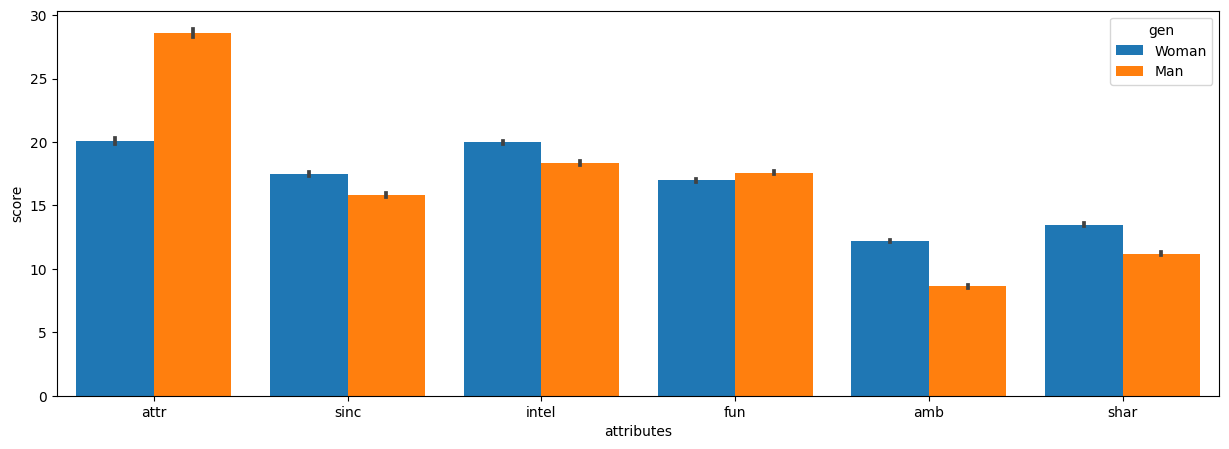

In [64]:
attribute_scores = [col for col in df.columns if 'gender' in col or
                                                 'iid' in col or
                                                 '1_1' in col or
                                                 '1_2' in col or
                                                 '1_3' in col]

attribute_df = df.loc[:,attribute_scores]
attribute_df = attribute_df.set_index('iid')
attribute_df.columns = attribute_df.columns.str[:-3]

attribute_df.groupby(by=attribute_df.columns, axis=1,sort=False).mean().groupby('iid').mean()

attribute_df['gen'] = attribute_df['gen'].apply(lambda x : 'Man' if x == 1 else 'Woman')

attribute_melt = pd.melt(attribute_df, id_vars='gen', var_name="attributes", value_name="score")

fig= plt.subplots(figsize=(15, 5))
sns.barplot(x='attributes', y="score", hue='gen', saturation=1, data = attribute_melt)

## How does each attribute affect succes in dating ?

In [65]:
%%capture --no-display
success_rate = []
for i in df['iid']: 
    mask = df['iid'] == i
    success_rate.append(df[mask]['dec_o'].sum()/len(df[mask]['dec_o']))

grouped_df = df.iloc[:, np.r_[0,2,24:30]]
grouped_df['success_rate'] = success_rate
grouped_df2 = grouped_df.groupby('iid').mean()
grouped_df2['gender'] = grouped_df2.gender.apply(lambda x : 'Man' if x == 1 else 'Woman' if  x == 0 else 'NaN')
grouped_df2 = grouped_df2.reset_index()

grouped_df2 = (grouped_df2.set_index(['iid','gender','success_rate']).rename_axis(['attributes'], axis=1).stack().reset_index())
grouped_df2.columns = ['iid', 'gender', 'success_rate', 'attributes', 'score']

fig = px.scatter(grouped_df2,x='score',y='success_rate',color='gender',trendline='ols', facet_col = "attributes",
                 color_discrete_sequence=['#1f77b4','#ff7f0e'],facet_col_wrap=3,template='simple_white')

fig.update_xaxes(title='')

fig.update_layout(
        title = go.layout.Title(text = "Success rate in dating vs partners' rating", x = 0.5),
        autosize=False,
        width=1500,
        height=800,
        margin=dict(l=20, r=20, t=50, b=20),
        showlegend=True,
        xaxis3=dict(title="Attribute scores"),
        legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01),)
fig.show()

## Are shared interests more important than a shared racial background?

<Axes: xlabel='samerace', ylabel='match'>

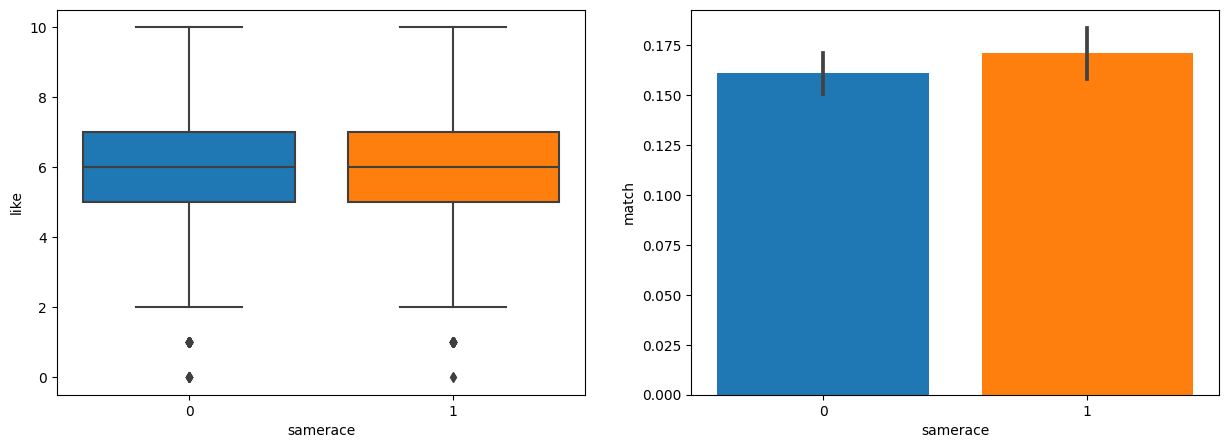

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(ax = ax[0],x="samerace", y='like', saturation=1, data = df)
sns.barplot(ax = ax[1],x="samerace", y='match', saturation=1, data = df)

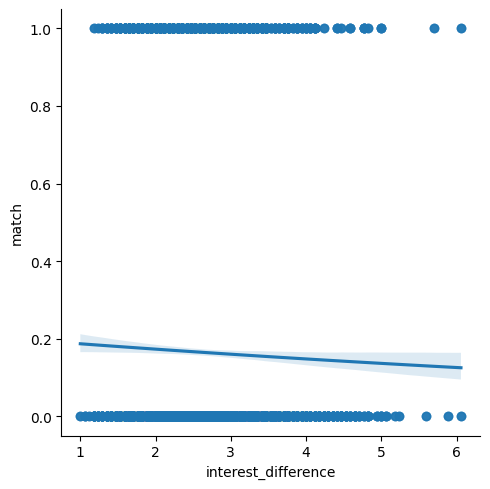

In [67]:
interests = df.iloc[:,np.r_[0,50:67]].groupby('iid').mean()
iid_pid = df.iloc[:,np.r_[0,11]]
match = df.iloc[:,np.r_[0,11,12]]

match_clean = match.dropna(subset=['pid'])
match_clean = match_clean.set_index('iid')

iid_pid_clean = iid_pid.dropna(subset=['pid'])
iid_pid_clean = iid_pid_clean.reset_index(drop=True)

score = []
for i in range(len(iid_pid_clean)):
    b = interests.loc[iid_pid_clean.loc[i,:]]
    score.append(b.diff().abs().mean(axis=1).iloc[1])

interest_data = pd.DataFrame()
interest_data['match'] = match_clean['match']
interest_data['interest_difference'] = score

sns.lmplot(x='interest_difference', y="match", data = interest_data, logistic=True)


## Can people accurately predict their own perceived value in the dating market?

In [68]:
df.describe(include='all').iloc[:,np.r_[87:92,98:103]]

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb
count,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524
std,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055
min,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000
50%,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000


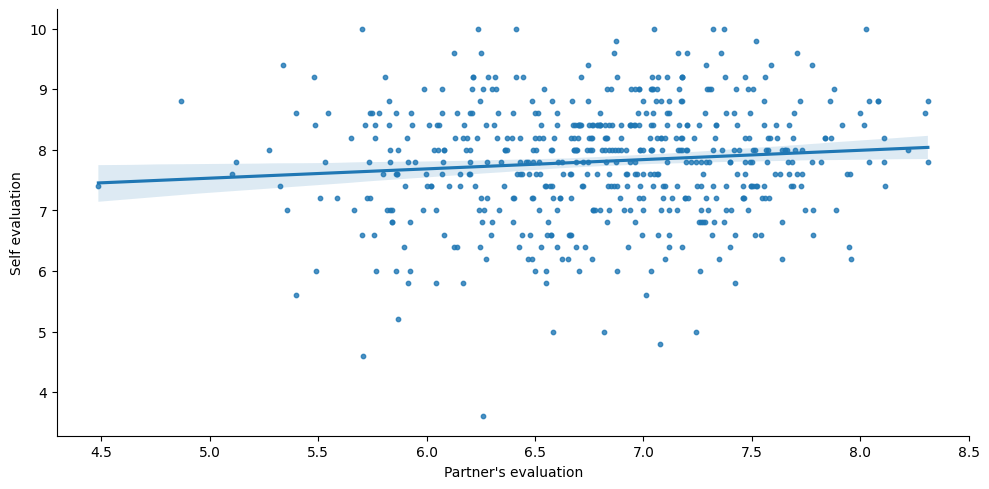

In [69]:
self_eval = df.iloc[:,np.r_[0,87:92]]
partner_eval = df.iloc[:,np.r_[0,24:29]] 

self_eval = self_eval.groupby('iid').mean().reset_index()
partner_eval = partner_eval.groupby('iid').mean().reset_index()


partner_eval = partner_eval.set_index('iid').rename_axis("")
self_eval = self_eval.set_index('iid').rename_axis("")

evals = pd.DataFrame()
evals['partner_eval'] = partner_eval.mean(axis=1)
evals['self_eval'] = self_eval.mean(axis=1)

plot_a = sns.lmplot(x='partner_eval',y='self_eval', data = evals, scatter_kws={"s": 10}, aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")


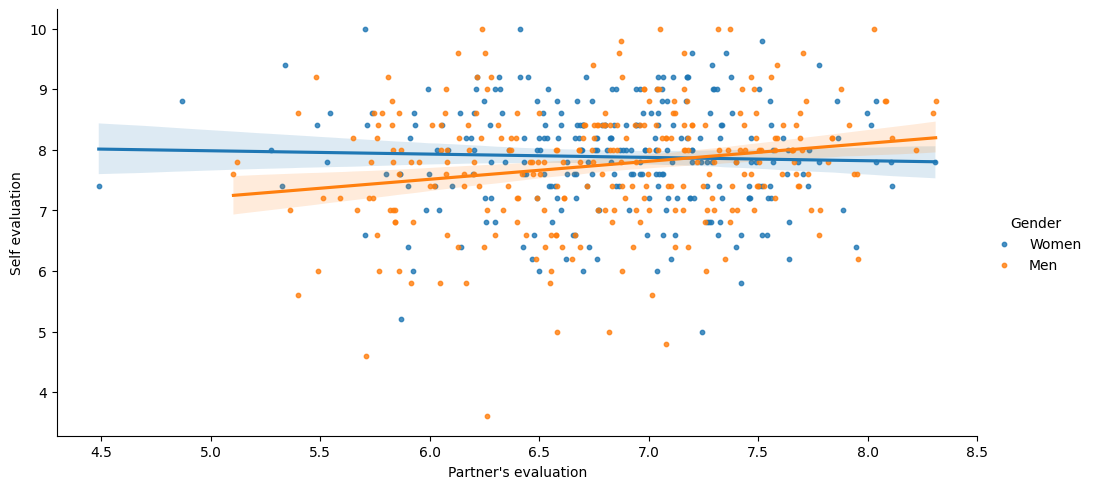

In [70]:
gender = df.iloc[:,np.r_[0,2]]
gender = gender.groupby('iid').mean().reset_index()

evals['Gender'] = gender['gender'].apply(lambda x : 'Men' if x == 1 else 'Women')

plot_a = sns.lmplot(x='partner_eval',y='self_eval', hue='Gender', data = evals, scatter_kws={"s": 10},aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")


In [71]:
!jupyter nbconvert  Speed_dating.ipynb --to html

[NbConvertApp] Converting notebook Speed_dating.ipynb to html
/home/nicolasleurs/.local/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 850462 bytes to Speed_dating.html
